<p style="align: center;"><img src="https://static.tildacdn.com/tild6636-3531-4239-b465-376364646465/Deep_Learning_School.png", width=500 ></p>

<h3 style="text-align: center;"><b>Физтех-Школа Прикладной математики и информатики (ФПМИ) МФТИ</b></h3>

---

<h2 style="text-align: center;"><b>Neural   Image Segmentation</b></h2>

<p style="text-align: center;"><i>руководитель проекта: Илья Захаркин (Сколтех, ФИВТ МФТИ) | @ilyazakharkin</i></p>

<p style="text-align: center;"><img src="https://he-s3.s3.amazonaws.com/media/uploads/67d854f.png"></p>

<h2 style="text-align: center;"><b>Этапы работы</b></h2>

Проект подразумевает выполнение всеми участниками пунктов 1-2, и далее выбор каждым слушателем своего сценария -- 1 или 2. Можно сделать оба сценария, то есть обучить модель на своих данных и её же встроить в демо, но для этого стоит быть готовым к удвоению затрачиваемого на проект времени.

<h3 style="text-align: center;"><b>Общий этап работы</b></h3>

**1). Выбор фреймворка/библиотеки для использования сегментации**

В выборе фреймворка предоставляется свобода, однако лично я смогу помочь в большей степени со следующими (перечислены в порядке моей личной рекомендации):
- [`torchvision.models.segmentation`](https://pytorch.org/docs/stable/_modules/torchvision/models/segmentation/segmentation.html): "нативные" модели для сегментации прямо из PyTorch. Примеры использования есть прямо на [занятии DLSchool по практике CV](https://www.youtube.com/watch?v=XSPYe4-y4HE), можно начать именно с того нойтбука и убедитьс, что все работает. **Hint**: если у вас на компьютере нет GPU, лучше с самого начала делать все в Google Colab.
- `detectron2`: краткая информация есть в конце [занятия DLSchool по практике CV](https://www.youtube.com/watch?v=XSPYe4-y4HE), можно начать с него. Лучше самостоятелньо изучить [официальный репозиторий](https://github.com/facebookresearch/detectron2) и уже с ним работать в дальнейшем (там есть Quick Start, с него можно начать и продолжить уже по аналогии).
- [`tensorflow object detection api`](https://github.com/tensorflow/models/tree/master/research/object_detection): можно использовать TF ObjDet API. Чтобы было проще начать, стоит посмотреть [занятие предыдущего года](https://www.youtube.com/watch?v=xHIzyrU1uVM). Там есть Mask-RCNN, его можно использовать для сегментации
- можно реалзиовать U-Net с нуля по [занятию Артура прошлого года](https://www.youtube.com/watch?v=OWK8VlgJM4I)

Рекомендую выбрать один из них и работать уже с этим модулем.

> ####  Какой-то странный подход в итоге получился ближе к этому : 
* можно реалзиовать U-Net с нуля по занятию Артура прошлого года
> ####   Я взял голый U-Net и обучал его с помощью Pytorch

> Результатом пункта является зафиксированный фреймворк для нейросети-сегментатора.

**2). Запуск сегментации на случайных изображениях**

Этот пункт просто про то, чтобы запустить любую модель сегментации в выбранном выше репозитории. Таким образом, часть с запуском будет работать, и далее уже можно приступать к основным сценариям.

> Результатом пункта явлется набор изображений, на каоторых модель успешно отработала и результат сегментации виден и понятен.

> ####  Просто тут попробуем любую модельку

In [1]:
from torchvision import models
import torchvision.transforms as T
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import torch
fcn = models.segmentation.fcn_resnet101(pretrained=True).eval()

In [2]:
# Define the helper function
def decode_segmap(image, nc=21):
  
  label_colors = np.array([(0, 0, 0),  # 0=background
               # 1=aeroplane, 2=bicycle, 3=bird, 4=boat, 5=bottle
               (128, 0, 0), (0, 128, 0), (128, 128, 0), (0, 0, 128), (128, 0, 128),
               # 6=bus, 7=car, 8=cat, 9=chair, 10=cow
               (0, 128, 128), (128, 128, 128), (64, 0, 0), (192, 0, 0), (64, 128, 0),
               # 11=dining table, 12=dog, 13=horse, 14=motorbike, 15=person
               (192, 128, 0), (64, 0, 128), (192, 0, 128), (64, 128, 128), (192, 128, 128),
               # 16=potted plant, 17=sheep, 18=sofa, 19=train, 20=tv/monitor
               (0, 64, 0), (128, 64, 0), (0, 192, 0), (128, 192, 0), (0, 64, 128)])

  r = np.zeros_like(image).astype(np.uint8)
  g = np.zeros_like(image).astype(np.uint8)
  b = np.zeros_like(image).astype(np.uint8)
  
  for l in range(0, nc):
    idx = image == l
    r[idx] = label_colors[l, 0]
    g[idx] = label_colors[l, 1]
    b[idx] = label_colors[l, 2]
    
  rgb = np.stack([r, g, b], axis=2)
  return rgb

In [3]:
def segment(net, path, show_orig=True, dev='cuda'):
  img = Image.open(path)
  if show_orig: plt.imshow(img); plt.axis('off'); plt.show()
  # Comment the Resize and CenterCrop for better inference results
  trf = T.Compose([T.Resize(640), 
                   #T.CenterCrop(224), 
                   T.ToTensor(), 
                   T.Normalize(mean = [0.485, 0.456, 0.406], 
                               std = [0.229, 0.224, 0.225])])
  inp = trf(img).unsqueeze(0).to(dev)
  out = net.to(dev)(inp)['out']
  om = torch.argmax(out.squeeze(), dim=0).detach().cpu().numpy()
  rgb = decode_segmap(om)
  plt.imshow(rgb); plt.axis('off'); plt.show()

> ####  что-то похожее на правду, хотя не без артефактов

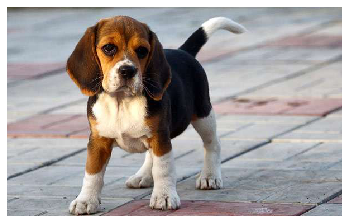

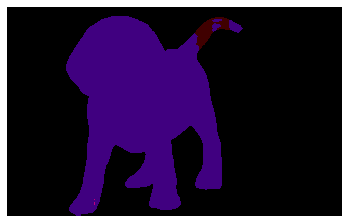

In [4]:
segment(fcn, './dog.jpg')

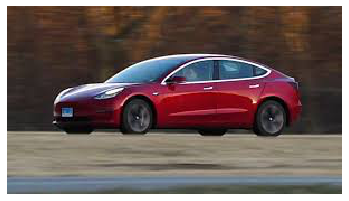

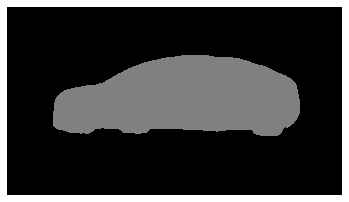

In [5]:
segment(fcn, './car.jpeg')

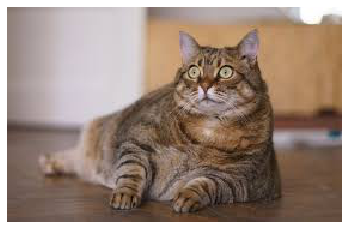

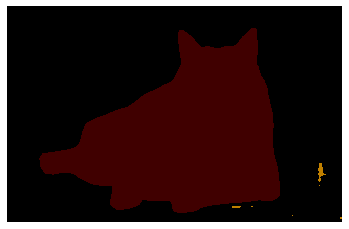

In [6]:
segment(fcn, './cat.jpeg')

<h3 style="text-align: center;"><b>2 сценарий</b></h3>

Во втором сценарии упор делается на сбор выборки, преобработку данных, обучение модели и измерение качества её работы (то есть осуществляется полный цикл разработки нейросетевой модели для задачи сегментации).

**3). Выбор датасета**

При работе с датасетом вы неизбежно столкнетесь с работой с файлами и папками (директориями). Рекомендуется освежить в памяти работу с библиотеками `os`, `json`, `glob`. Может помочь [этот туториал](https://realpython.com/working-with-files-in-python/).

По-умолчанию модели из `torchvision.models.segmentation` обучены на [MS COCO](http://cocodataset.org/#home) или [PASCAL VOC](http://host.robots.ox.ac.uk/pascal/VOC/) датасете. Рекомендуется про них тоже почитать по приведенным ссылкам, потому что это крайне часто используемые в зрении наборы данных.

На выбор предоставляются датасеты для сегментации объектов:
1. [Семантическая и instance-сегментация датасета Cityscapes](https://www.cityscapes-dataset.com/downloads/): известный датасет для сегментации машин, пешеходов и вообще элементов обычных улиц в целом. Ознакомиться с примерами разметки можно [здесь](https://www.cityscapes-dataset.com/examples/#fine-annotations). Если для скачивания датасета Ваша почта не подходит (нужен корпоративный аккаунт), можно скачать его [этой ссылке](https://drive.google.com/open?id=1ht502uaDQmQYNoTMnRwLyn4BVluklwP1). Для предобработки данных могут пригодиться [эти скрипты](https://github.com/mcordts/cityscapesScripts). Также у MIT-курса по DL есть [занятие на Cityscapes](https://github.com/lexfridman/mit-deep-learning/blob/master/tutorial_driving_scene_segmentation/tutorial_driving_scene_segmentation.ipynb), можно посмотреть его;
2. [Семантическая сегментация автомобилей из фона](https://www.kaggle.com/c/carvana-image-masking-challenge/data): чтобы было проще начать предобработку данных, можно посмотреть [этот ноутбук с соревнования](https://www.kaggle.com/vfdev5/data-visualization);
3. [Семантическая сегментация типов поверхностей (материалов, из которых они сделаны)](http://opensurfaces.cs.cornell.edu/publications/opensurfaces/): на том же сайте есть ссылки на документацию, которая определнно будет полезна при предобработке;
4. [Семантическая сегментация ядер в биологических клетках](https://www.kaggle.com/c/data-science-bowl-2018/data): стоит посмотреть [этот ноутбук с соревнования](https://www.kaggle.com/stkbailey/teaching-notebook-for-total-imaging-newbies), чтобы уметь правильно предобрабатывать данные;
5. [Instance-сегментация одежды](https://github.com/switchablenorms/DeepFashion2): стоит прочитать README на главной странице репозитория. Для получения датасета нужно запросить пароль у автора через гугл-форму. После скачивания распакуйте его с использованием пароля. Из файлов аннотаций нас будут интересовать только `segmentation`, `category_name` и `category_id`

> Результатом выполнения пункта явлется загруженный датасет, состоящий из изображений и разметки к ним (масок всех объектов на каждом изображении).

> #### Скачаем датасет Carvana:

In [1]:
import os
os.environ['KAGGLE_USERNAME'] = "gavril2" # username from the json file
os.environ['KAGGLE_KEY'] = "52beb4d3fdafcbe08b3f9d042871f6ac" # key from the json file

In [2]:
#!kaggle competitions download -c carvana-image-masking-challenge
#!unzip  carvana-image-masking-challenge.zip -d carvana-image-masking-challenge

**4). Предобработка данных**

Самый непростой этап в этом сценарии. Скачать данные -- лишь половина дела. Чтобы обучить нейросеть на этих данных, нужно написать генератор батчей. Однако если будем подавать изображения так, как они есть, то даже батч собрать не сможем -- нужно привести их к однмоу размеру. Далее нужно привести их к типу float, переместить на CUDA и поделить на 255 (подробнее см. [занятие](https://www.youtube.com/watch?v=XSPYe4-y4HE)). Также нужно настроить аугментации и постобработку.

То, как именно все это будет реализоваться -- зависит от инструмента, выбранного в пункте 1. Например, в detectron2 в обучалках есть то, какими на вход принимаются данные для обучения. Возможно, нужно будет зайти в документацию и почитать более подроюно, чтобы разобраться, какой именно формат масок принимает на вход сеть для сегментации при обучении.

НЕ нужно копировать все файлы с картинками и разметкой прямо на диске в их предобработанные версии. Хороший тон -- осуществлять всю эту обработку программно, "на лету". То есть в идеале вы прописываете тот самый `DataLoader`, который на вход берет пути к изоборажениям и файлам разметки, а возвращать будет батчи нужного размера с уже обработанными числовыми тензорами изобраений и боксов. Можно реализовать эти функции по аналогии с теми, что есть в [Catalyst](https://github.com/catalyst-team/catalyst), который был рассмотрен на занятии.

> Результатом выполнения пункта явлется код, запуск которого ведет к подаче батчей правильного вида (разметка приведена к требуемому формату масок, изображения нужного типа, размера и поделены на 255 и т.д.) для обучения нейронной сети для сегментации.

In [3]:
import os
from os.path import isfile, join
from PIL import Image

import torch
import torch.nn.functional as F
import torch.optim as optim
from torch import nn
from torch.utils.data import DataLoader
from torch.utils.data.dataset import Dataset
from torchvision import transforms
from torchvision.utils import make_grid
from torch.autograd import Variable
from torchsummary import summary
# pip install tqdm
from tqdm import tqdm
# if we use notebooks we import tqdm in that way instead of the previos one
# from tqdm import tqdm_notebook as tqdm
import sys
import re
import numpy as np
import random
import matplotlib.pyplot as plt

import shutil
from pathlib import Path
import torch.nn as nn
import segmentation_models_pytorch as smp
from tensorboardX import SummaryWriter
# Restart runtime before running this code block if new PIL installed
import torch
print("PyTorch version: ", torch.__version__)
print("CUDA version: ", torch.version.cuda)
print("cuDNN version is: ", torch.backends.cudnn.version())
print('Device:', torch.device('cuda:0'))
import cv2
import PIL
import albumentations as albu
from sklearn.model_selection import train_test_split
from albumentations.pytorch import ToTensor
#print('Python PIL version:', PIL.PILLOW_VERSION)

PyTorch version:  1.4.0
CUDA version:  10.1
cuDNN version is:  7603
Device: cuda:0


In [4]:
SEED = 42

random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
torch.cuda.manual_seed(SEED)
torch.backends.cudnn.deterministic = True

In [5]:
def visualize(**images):
    """PLot images in one row."""
    n = len(images)
    plt.figure(figsize=(16, 5))
    for i, (name, image) in enumerate(images.items()):
        plt.subplot(1, n, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.title(' '.join(name.split('_')).title())
        plt.imshow(image)
    plt.show()

In [6]:
DATA_MODES = ['train', 'val', 'test']
# Очень уж большщите оргинальные картинки-уменьшим их до 256 * 256
RESCALE_SIZE = 256
DEVICE = torch.device("cuda")

In [7]:
TRAIN_DIR = Path('data/train')
TRAIN_MASK_DIR = Path('data/train_masks')
TEST_DIR = Path('data/train')
SAVE_DIR = Path('models/')

train_val_files = sorted(list(TRAIN_DIR.rglob('*.jpg')))
train_val_masks = sorted(list(TRAIN_MASK_DIR.rglob('*.gif')))
test_files = sorted(list(TEST_DIR.rglob('*.jpg')))


train_files, valid_files = train_test_split(train_val_files, test_size=0.3,random_state=42)
train_mask, valid_mask = train_test_split(train_val_masks, test_size=0.3,random_state=42)

In [8]:
def get_training_augmentation():
    train_transform = [

        albu.HorizontalFlip(p=0.5
                           ),

        albu.ShiftScaleRotate(scale_limit=0.8, rotate_limit=0, shift_limit=0.1, p=1, border_mode=0),

        albu.PadIfNeeded(min_height=1280, min_width=1918, always_apply=True, border_mode=0),
        albu.CenterCrop(height=1280, width=1918, always_apply=True),

        albu.IAAAdditiveGaussianNoise(p=0.2),
        albu.IAAPerspective(p=0.5),

        albu.OneOf(
            [
                albu.CLAHE(p=1),
                albu.RandomBrightness(p=1),
                albu.RandomGamma(p=1),
            ],
            p=0.9,
        ),

        albu.OneOf(
            [
                albu.IAASharpen(p=1),
                albu.Blur(blur_limit=3, p=1),
                albu.MotionBlur(blur_limit=3, p=1),
            ],
            p=0.9,
        ),

        albu.OneOf(
            [
                albu.RandomContrast(p=1),
               albu.HueSaturationValue(p=1),
            ],
            p=0.9,
        ),
    ]
    return albu.Compose(train_transform)



In [39]:
class CarvanaDataset(Dataset):
    def __init__(self, files,masks,  mode='train',augmentation = None,preprocessing=None):
        super().__init__()
        self.files = files
        self.masks = masks
        self.mode = mode
        self.preprocessing = preprocessing
        self.len_ = len(self.files)
        self.augmentation = augmentation
        if self.mode not in DATA_MODES:
            print(f'wrong mode: {self.mode}')
            raise NameError
            

    def load_sample(self, file):
        image = Image.open(file)
        image.load()
        #image = image.resize((RESCALE_SIZE, RESCALE_SIZE))
        #print(image)
        return image
    
    def __getitem__(self, index):
        image = np.array(self.load_sample(self.files[index]))
        mask =np.array( self.load_sample(self.masks[index]))
        mask = mask[... ,np.newaxis]
        
        if self.augmentation:
            sample = self.augmentation(image=image,mask=mask)
            image, mask= sample['image'], sample['mask']
            
        if self.preprocessing:
            sample = self.preprocessing(image=image, mask=mask)
            image, mask= sample['image'], sample['mask']
            
            
            
        return image.transpose(2, 0, 1).astype('float32') ,mask.transpose(2, 0, 1).astype('float32')
    def __len__(self):
        return len(self.files)   

    
def get_preprocessing():
   
    _transform = [
       albu.Resize(RESCALE_SIZE,RESCALE_SIZE),
        albu.Normalize(),

    ]
    return albu.Compose(_transform)   
        


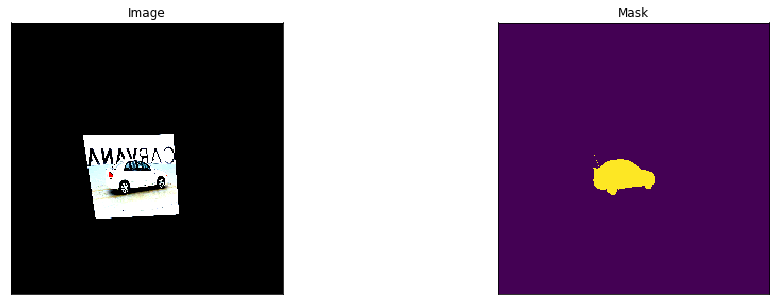

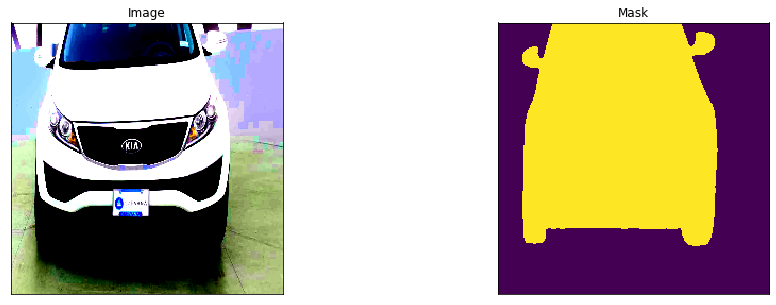

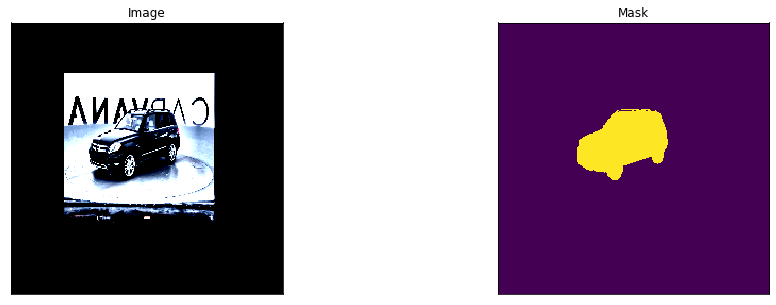

In [40]:
augmented_dataset = CarvanaDataset(files=train_files,masks=train_mask, 
                           
                               augmentation=get_training_augmentation(),
                               preprocessing=get_preprocessing()

                               
                               
                               )

for i in range(3):
    image,mask = augmented_dataset[i]

    visualize(image=image.transpose(1,2,0)
              , mask=mask.squeeze())

In [ ]:
train_dataset =CarvanaDataset(files=train_files,masks=train_mask, 
                                mode='train',
                               augmentation=get_training_augmentation(),
                               preprocessing=get_preprocessing()

                               
                               
                               )

valid_dataset = CarvanaDataset(files=valid_files,masks=valid_mask, 
                                mode='valid',
                              #augmentation=get_training_augmentation(),
                              preprocessing=get_preprocessing()

                               
                               
                               )


In [ ]:
train_loader = DataLoader(train_dataset, batch_size=6, shuffle=True, num_workers=4)
valid_loader = DataLoader(valid_dataset, batch_size=6, shuffle=False, num_workers=4)

**5). Обучение модели для сегментации** 

Стоит написать цикл обучения на PyTorch самостоятельно. Однако запрещать пользоваться сторонними библиотеками для обучения я не буду: можно использовать [Catalyst](https://github.com/catalyst-team/catalyst), [PyTorch Lightning](https://github.com/williamFalcon/pytorch-lightning) или [Ignite](https://github.com/pytorch/ignite). То есть саму модель можно взять из фреймворка из пункта 1, и само обучение осуществлять с помощью одной перечисленных трех библиотек (фреймворков).

> Результатом выполнения пункта явлется код, запуск которого ведет к обучению модели на выбранном датасете. При обучении **обязателньо выводить числовые значения лосса на трейне и валидации**, крайне желательно использовать [`TensorBoard`](https://pytorch.org/docs/stable/tensorboard.html) для визуализации. Обязательно также сохранять модель после каждой N-ой эпохи, чтобы потом ее качество можно было проверить и веса были переиспользуемыми.

> ####  Возьмем классический UNET

In [10]:
class UNet(nn.Module):
    """ `UNet` class is based on https://arxiv.org/abs/1505.04597
    The U-Net is a convolutional encoder-decoder neural network.
    Contextual spatial information (from the decoding,
    expansive pathway) about an input tensor is merged with
    information representing the localization of details
    (from the encoding, compressive pathway).
    Modifications to the original paper:
    (1) padding is used in 3x3 convolutions to prevent loss
        of border pixels
    (2) merging outputs does not require cropping due to (1)
    (3) residual connections can be used by specifying
        UNet(merge_mode='add')
    (4) if non-parametric upsampling is used in the decoder
        pathway (specified by upmode='upsample'), then an
        additional 1x1 2d convolution occurs after upsampling
        to reduce channel dimensionality by a factor of 2.
        This channel halving happens with the convolution in
        the tranpose convolution (specified by upmode='transpose')
    """

    def __init__(self, num_classes, in_channels=3, depth=5,
                 start_filts=64, up_mode='transpose',
                 merge_mode='concat'):
        """
        Arguments:
            in_channels: int, number of channels in the input tensor.
                Default is 3 for RGB images.
            depth: int, number of MaxPools in the U-Net.
            start_filts: int, number of convolutional filters for the
                first conv.
            up_mode: string, type of upconvolution. Choices: 'transpose'
                for transpose convolution or 'upsample' for nearest neighbour
                upsampling.
        """
        super(UNet, self).__init__()

        if up_mode in ('transpose', 'upsample'):
            self.up_mode = up_mode
        else:
            raise ValueError("\"{}\" is not a valid mode for "
                             "upsampling. Only \"transpose\" and "
                             "\"upsample\" are allowed.".format(up_mode))

        if merge_mode in ('concat', 'add'):
            self.merge_mode = merge_mode
        else:
            raise ValueError("\"{}\" is not a valid mode for"
                             "merging up and down paths. "
                             "Only \"concat\" and "
                             "\"add\" are allowed.".format(up_mode))

        # NOTE: up_mode 'upsample' is incompatible with merge_mode 'add'
        if self.up_mode == 'upsample' and self.merge_mode == 'add':
            raise ValueError("up_mode \"upsample\" is incompatible "
                             "with merge_mode \"add\" at the moment "
                             "because it doesn't make sense to use "
                             "nearest neighbour to reduce "
                             "depth channels (by half).")

        self.num_classes = num_classes
        self.in_channels = in_channels
        self.start_filts = start_filts
        self.depth = depth

        self.down_convs = []
        self.up_convs = []

        # create the encoder pathway and add to a list
        for i in range(depth):
            ins = self.in_channels if i == 0 else outs
            outs = self.start_filts*(2**i)
            pooling = True if i < depth-1 else False

            down_conv = DownConv(ins, outs, pooling=pooling)
            self.down_convs.append(down_conv)

        # create the decoder pathway and add to a list
        # - careful! decoding only requires depth-1 blocks
        for i in range(depth-1):
            ins = outs
            outs = ins // 2
            up_conv = UpConv(ins, outs, up_mode=up_mode,
                merge_mode=merge_mode)
            self.up_convs.append(up_conv)

        self.conv_final = conv1x1(outs, self.num_classes)

        # add the list of modules to current module
        self.down_convs = nn.ModuleList(self.down_convs)
        self.up_convs = nn.ModuleList(self.up_convs)

        self.reset_params()
    def predict(self, x):
        
        """Inference method. Switch model to `eval` mode, call `.forward(x)` with `torch.no_grad()`

        Args:
            x: 4D torch tensor with shape (batch_size, channels, height, width)

        Return:
            prediction: 4D torch tensor with shape (batch_size, classes, height, width)

        """
        if self.training:
            self.eval()

        with torch.no_grad():
            x = self.forward(x)

        return x

    @staticmethod
    def weight_init(m):
        if isinstance(m, nn.Conv2d):
            nn.init.xavier_normal(m.weight)
            nn.init.constant(m.bias, 0)


    def reset_params(self):
        for i, m in enumerate(self.modules()):
            self.weight_init(m)

    def forward(self, x):
        encoder_outs = []

        # encoder pathway, save outputs for merging
        for i, module in enumerate(self.down_convs):
            x, before_pool = module(x)
            encoder_outs.append(before_pool)

        for i, module in enumerate(self.up_convs):
            before_pool = encoder_outs[-(i+2)]
            x = module(before_pool, x)

        # No softmax is used. This means you need to use
        # nn.CrossEntropyLoss is your training script,
        # as this module includes a softmax already.
        x = self.conv_final(x)
        return x
class DownConv(nn.Module):
    """
    A helper Module that performs 2 convolutions and 1 MaxPool.
    A ReLU activation follows each convolution.
    """
    def __init__(self, in_channels, out_channels, pooling=True):
        super(DownConv, self).__init__()

        self.in_channels = in_channels
        self.out_channels = out_channels
        self.pooling = pooling

        self.conv1 = conv3x3(self.in_channels, self.out_channels)
        self.conv2 = conv3x3(self.out_channels, self.out_channels)

        if self.pooling:
            self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        before_pool = x
        if self.pooling:
            x = self.pool(x)
        return x, before_pool

class UpConv(nn.Module):
    """
    A helper Module that performs 2 convolutions and 1 UpConvolution.
    A ReLU activation follows each convolution.
    """
    def __init__(self,
                 in_channels,
                 out_channels,
                 merge_mode='concat',
                 up_mode='transpose'):
        super(UpConv, self).__init__()

        self.in_channels = in_channels
        self.out_channels = out_channels
        self.merge_mode = merge_mode
        self.up_mode = up_mode

        self.upconv = upconv2x2(self.in_channels,
                                self.out_channels,
                                mode=self.up_mode)

        if self.merge_mode == 'concat':
            self.conv1 = conv3x3(2*self.out_channels,
                                 self.out_channels)
        else:
            # num of input channels to conv2 is same
            self.conv1 = conv3x3(self.out_channels, self.out_channels)

        self.conv2 = conv3x3(self.out_channels, self.out_channels)

    def forward(self, from_down, from_up):
        """ Forward pass
        Arguments:
            from_down: tensor from the encoder pathway
            from_up: upconv'd tensor from the decoder pathway
        """
        from_up = self.upconv(from_up)
        if self.merge_mode == 'concat':
            x = torch.cat((from_up, from_down), 1)
        else:
            x = from_up + from_down
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        return x
    
def conv1x1(in_channels, out_channels, groups=1):
    return nn.Conv2d(in_channels,
                     out_channels,
                     kernel_size=1,
                     groups=groups,
                     stride=1)

def conv3x3(in_channels, out_channels, stride=1, padding=1, bias=True, groups=1):
    return nn.Conv2d(in_channels,
                     out_channels,
                     kernel_size=3,
                     stride=stride,
                     padding=padding,
                     bias=bias,
                     groups=groups)

def upconv2x2(in_channels, out_channels, mode='transpose'):
    if mode == 'transpose':
        return nn.ConvTranspose2d(in_channels,
                                  out_channels,
                                  kernel_size=2,
                                  stride=2)
    else:
        return nn.Sequential(
            nn.Upsample(mode='bilinear', scale_factor=2),
            conv1x1(in_channels, out_channels))


> #### Нам нужен всего один класс

In [11]:
model=UNet(num_classes=1).cuda()

/home/gavril/.local/lib/python3.6/site-packages/ipykernel_launcher.py:116: UserWarning: nn.init.xavier_normal is now deprecated in favor of nn.init.xavier_normal_.
/home/gavril/.local/lib/python3.6/site-packages/ipykernel_launcher.py:117: UserWarning: nn.init.constant is now deprecated in favor of nn.init.constant_.


In [13]:

class Meter(object):
    '''Meters provide a way to keep track of important statistics in an online manner.
    This class is abstract, but provides a standard interface for all meters to follow.
    '''

    def reset(self):
        '''Resets the meter to default settings.'''
        pass

    def add(self, value):
        '''Log a new value to the meter
        Args:
            value: Next restult to include.
        '''
        pass

    def value(self):
        '''Get the value of the meter in the current state.'''
        pass


class AverageValueMeter():
    def __init__(self):
        super(AverageValueMeter, self).__init__()
        self.reset()
        self.val = 0

    def add(self, value, n=1):
        self.val = value
        self.sum += value
        self.var += value * value
        self.n += n

        if self.n == 0:
            self.mean, self.std = np.nan, np.nan
        elif self.n == 1:
            self.mean = 0.0 + self.sum  # This is to force a copy in torch/numpy
            self.std = np.inf
            self.mean_old = self.mean
            self.m_s = 0.0
        else:
            self.mean = self.mean_old + (value - n * self.mean_old) / float(self.n)
            self.m_s += (value - self.mean_old) * (value - self.mean)
            self.mean_old = self.mean
            self.std = np.sqrt(self.m_s / (self.n - 1.0))

    def value(self):
        return self.mean, self.std

    def reset(self):
        self.n = 0
        self.sum = 0.0
        self.var = 0.0
        self.val = 0.0
        self.mean = np.nan
        self.mean_old = 0.0
        self.m_s = 0.0
        self.std = np.nan

> #### Определим метрики и функцию потерь: 

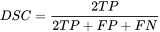

In [1]:
from IPython.display import Image
Image("dice.png")

In [15]:

def _threshold(x, threshold=None):
    if threshold is not None:
        return (x > threshold).type(x.dtype)
    else:
        return x
def dice_score(pr, gt,  eps=1e-7, threshold=None):
    pr = _threshold(pr, threshold=threshold)
    tp = torch.sum(gt * pr)
    fp = torch.sum(pr) - tp
    fn = torch.sum(gt) - tp

    score = (2 * tp + eps) \
            / (2 * tp +  fn + fp + eps)

    return score

In [16]:
class DiceLoss(nn.Module):

    def __init__(self, eps=1., **kwargs):
        super().__init__(**kwargs)
        self.eps = eps     
        self.activation = nn.Sigmoid()
        

    def forward(self, y_pr, y_gt):
        y_pr = self.activation(y_pr)
        return 1 - dice_score(
            y_pr, y_gt, 
            eps=self.eps,
            threshold=None
        )


In [17]:
def iou(pr, gt, eps=1e-7, threshold=.5):
    pr = _threshold(pr, threshold=threshold)
    intersection = torch.sum(gt * pr)
    union = torch.sum(gt) + torch.sum(pr) - intersection + eps
    return (intersection + eps) / union


> #### В результате эксперимертов выяснилось, что Адам с таким ЛР лучше всего работают:

In [18]:
loss =DiceLoss()
optimizer = torch.optim.Adam([ dict(params=model.parameters(), lr=1e-4),])

In [20]:

class Epoch:

    def __init__(self, model, loss,optimizer ,mode='train', device='cpu', verbose=True, count=1):
        self.model = model
        self.mode=mode
        self.loss = loss
        self.verbose = verbose
        self.device = device
        self._to_device()
        self.optimizer = optimizer
        self.count=count
        
    def _to_device(self):
        self.model.to(self.device)
        self.loss.to(self.device)

    def _format_logs(self, logs):
        str_logs = ['{} - {:.4}'.format(k, v) for k, v in logs.items()]
        s = ', '.join(str_logs)
        return s
    def batch_update(self, x, y):
        if self.mode=='train':
            self.optimizer.zero_grad()
            prediction = self.model.forward(x)
            loss = self.loss(prediction, y)
            loss.backward()
            self.optimizer.step()
            return loss, prediction
        else:
            with torch.no_grad():
                prediction = self.model.forward(x)
                loss = self.loss(prediction, y)
            return loss, prediction
            

    def run(self, dataloader):
        
       
        
        logs = {}
        loss_meter = AverageValueMeter()
        metric_meter=AverageValueMeter()
        if self.mode=='train': 
            
            model.train()
        else:
            model.eval()
                
        with tqdm(dataloader,desc= self.mode, file=sys.stdout, disable=not (self.verbose)) as iterator:
            for x, y in iterator:
                x, y = x.to(self.device), y.to(self.device)
                loss, y_pred = self.batch_update(x, y)
                
                # update loss logs
                loss_value = loss.cpu().detach().numpy()
                loss_meter.add(loss_value)
                loss_logs = {'dice_loss': loss_meter.mean}                 
                logs.update(loss_logs)
                
             
                metric_value = iou(y_pred, y).cpu().detach().numpy()
                metric_meter.add(metric_value)   
                metric_logs = {'IoU': metric_meter.mean}
                logs.update(metric_logs)
                
                if self.verbose:
                    s = self._format_logs(logs)
                    iterator.set_postfix_str(s)
                
                if self.mode=='train':
                    
                    logger.add_scalar('Loss/train', loss_meter.mean, self.count + 1)
                    logger.add_scalar('iou/train', metric_meter.mean, self.count + 1)
                    if (self.count+1)%100==0:
                     # Будем сохранять по одной каритинке каждый 100 бачей, а 
                        # то очень уж много это все весить начинает:
                        logger.add_image('model/(train)output', _threshold(y_pred.data[0], threshold=.5), self.count + 1)
                else:
                    logger.add_scalar('Loss/valid', loss_meter.mean, self.count + 1)
                    logger.add_scalar('iou/valid', metric_meter.mean, self.count + 1) 
                    if (self.count+1)%100==0:
                        logger.add_image('model/(valid)output', _threshold(y_pred.data[0], threshold=.5), self.count + 1)


                self.count+=1    
        return logs     
                   



   

In [ ]:
train=Epoch(
    model, 
    loss=loss, 
    optimizer=optimizer,
    device=DEVICE,
    verbose=True,
    count=0
)
valid=Epoch(
    model, 
    loss=loss, 
    optimizer=optimizer,
    device=DEVICE,
    verbose=True,
    count=0,
    mode='valid'
)

In [21]:
experiment = "try_XXX"
logger = SummaryWriter(comment=experiment)
max_score = 0


for i in range(0,70):
    
    print('\nEpoch: {}'.format(i))
    train_logs = train.run(train_loader)
    valid_logs = valid.run(valid_loader)
    
    
    if max_score < valid_logs['IoU']:
        max_score = valid_logs['IoU']
        torch.save(model, './best_model_'+str(max_score)+'_epoch_'+str(i)+'_.pth')
        print('Model saved!',max_score)    

    if i == 40:
        optimizer.param_groups[0]['lr'] = 1e-5
        print('Decrease decoder learning rate to 1e-5!')         
logger.close()   


Epoch: 0
valid: 100%|██████████| 255/255 [00:27<00:00,  9.39it/s, dice_loss - 0.07865, IoU - 0.8543]
Model saved! 0.854343965474297

Epoch: 1
train:   0%|          | 0/594 [00:00<?, ?it/s]

/home/gavril/.local/lib/python3.6/site-packages/torch/serialization.py:360: UserWarning: Couldn't retrieve source code for container of type UNet. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/home/gavril/.local/lib/python3.6/site-packages/torch/serialization.py:360: UserWarning: Couldn't retrieve source code for container of type DownConv. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/home/gavril/.local/lib/python3.6/site-packages/torch/serialization.py:360: UserWarning: Couldn't retrieve source code for container of type UpConv. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


valid: 100%|██████████| 255/255 [00:27<00:00,  9.34it/s, dice_loss - 0.04289, IoU - 0.919] 
Model saved! 0.9189922601568935

Epoch: 2
valid: 100%|██████████| 255/255 [00:26<00:00,  9.69it/s, dice_loss - 0.06576, IoU - 0.8793]

Epoch: 3
valid: 100%|██████████| 255/255 [00:26<00:00,  9.69it/s, dice_loss - 0.02159, IoU - 0.9577]
Model saved! 0.9577282608724105

Epoch: 4
valid: 100%|██████████| 255/255 [00:26<00:00,  9.62it/s, dice_loss - 0.01829, IoU - 0.9641]
Model saved! 0.9641225373043731

Epoch: 5
valid: 100%|██████████| 255/255 [00:26<00:00,  9.69it/s, dice_loss - 0.0203, IoU - 0.9605] 

Epoch: 6
valid: 100%|██████████| 255/255 [00:26<00:00,  9.70it/s, dice_loss - 0.01427, IoU - 0.972] 
Model saved! 0.9719696603569329

Epoch: 7
valid: 100%|██████████| 255/255 [00:26<00:00,  9.66it/s, dice_loss - 0.01563, IoU - 0.9695]

Epoch: 8
valid: 100%|██████████| 255/255 [00:26<00:00,  9.66it/s, dice_loss - 0.01364, IoU - 0.9731]
Model saved! 0.9731208296383129

Epoch: 9
valid: 100%|██████████| 

valid: 100%|██████████| 255/255 [00:26<00:00,  9.77it/s, dice_loss - 0.006639, IoU - 0.9869]
Model saved! 0.986863123201857
Decrease decoder learning rate to 1e-5!

Epoch: 41
valid: 100%|██████████| 255/255 [00:26<00:00,  9.77it/s, dice_loss - 0.006426, IoU - 0.9872]
Model saved! 0.9872383470628777

Epoch: 42
valid: 100%|██████████| 255/255 [00:26<00:00,  9.78it/s, dice_loss - 0.006312, IoU - 0.9875]
Model saved! 0.9874855738060148

Epoch: 43
valid: 100%|██████████| 255/255 [00:26<00:00,  9.78it/s, dice_loss - 0.006274, IoU - 0.9876]
Model saved! 0.987558161277397

Epoch: 44
valid: 100%|██████████| 255/255 [00:26<00:00,  9.77it/s, dice_loss - 0.006245, IoU - 0.9876]
Model saved! 0.9876084402495743

Epoch: 45
valid: 100%|██████████| 255/255 [00:26<00:00,  9.75it/s, dice_loss - 0.006194, IoU - 0.9877]
Model saved! 0.9877269345171309

Epoch: 46
valid: 100%|██████████| 255/255 [00:26<00:00,  9.77it/s, dice_loss - 0.006214, IoU - 0.9877]

Epoch: 47
valid: 100%|██████████| 255/255 [00:26<00:

**6). Измерения качества работы модели (метрики согласуются с руководителем и зависят от задачи)**

Под метриками понимаются функции/формулы, по которым оценивается качество модели для сегментации. Обычно для измерения качества работы нейросети для сегментации используют **IoU** и **попиксельную Accuracy** для каждого класса по-отдельности. Подробно метрики можно почитать [здесь](https://www.jeremyjordan.me/evaluating-image-segmentation-models/), также **обязательная к прочетнию [часть статьи про DICE loss](https://www.jeremyjordan.me/semantic-segmentation/#loss)** (а лучше и вовсе рочитать всю статью полностью).

В зависимости от датасета и задачи (семантическая или instance) метрика может быть или IoU, или попиксельный Accuracy, или сам DICE. Мы по-умолчанию будем использовать IoU, её и стоит реализовать для **семантической сегментации** (по-желанию можно реализовать и остальные метрики). Для **instance-сегментации** стоит выводить precision и recall для каждого класса, зафиксировав порог IoU, после которого сегментация считается "попавшей" в Groung Truth разметку.

Необходимо самостоятельно реализовать метрики для задачи сегментации. На вход функциям метрик поступают веса модели и выборка, на которой метрики нужно измерить. На выходе -- таблица с метриками для каждого класса.

> Результат пункта -- реализованные функции метрик для задачи сегментации, позволяющие оценить качество работы модели на выборке.

> #### Ну у нас всего один классс. IoU на валидационном сете =

In [24]:
max_score 

0.9884051986769132

In [45]:
#logs_base_dir = "./runs"
#os.makedirs(logs_base_dir, exist_ok=True)
#%load_ext tensorboard
#%tensorboard --logdir {logs_base_dir}

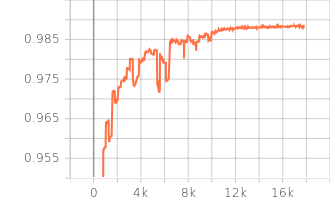

In [3]:
Image("iou_valid.png")

In [37]:
model= torch.load('./best_model_0.9884051986769132_epoch_68_.pth')

> #### Поссмотрим как работает моедль

IoU =  0.989365816116333


<Figure size 432x288 with 0 Axes>

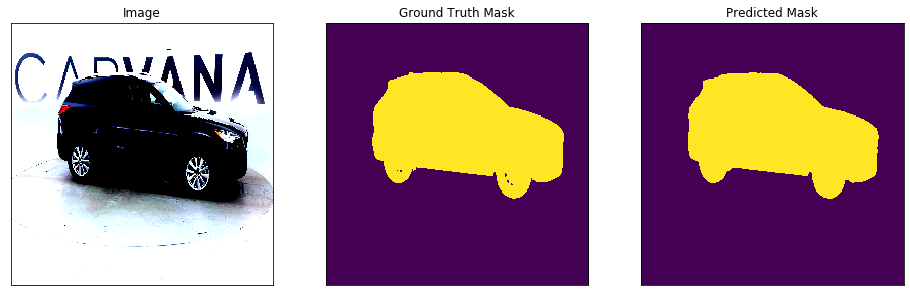

IoU =  0.988321840763092


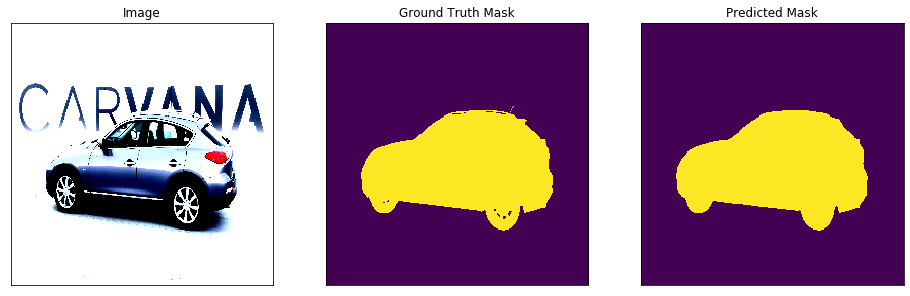

IoU =  0.991054892539978


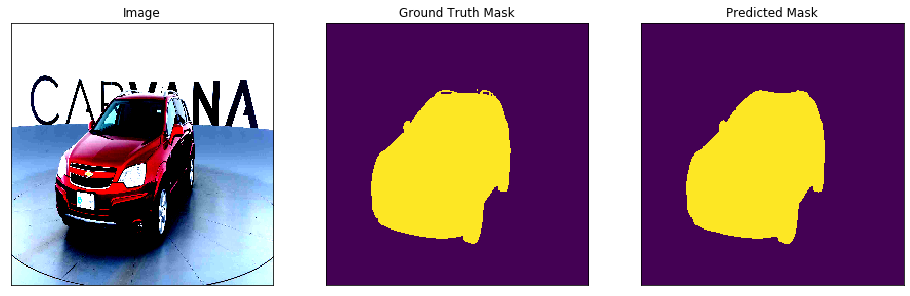

IoU =  0.9852288365364075


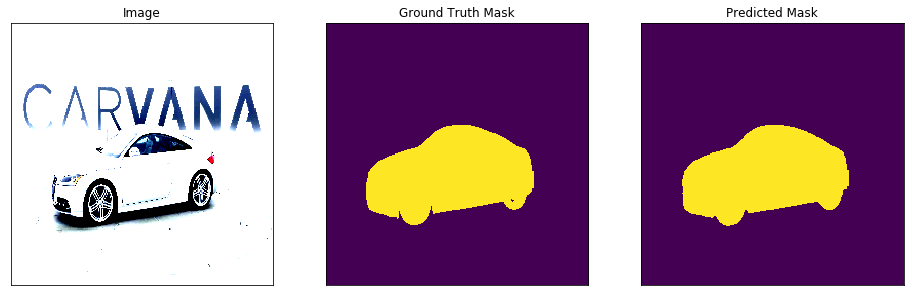

IoU =  0.9874600172042847


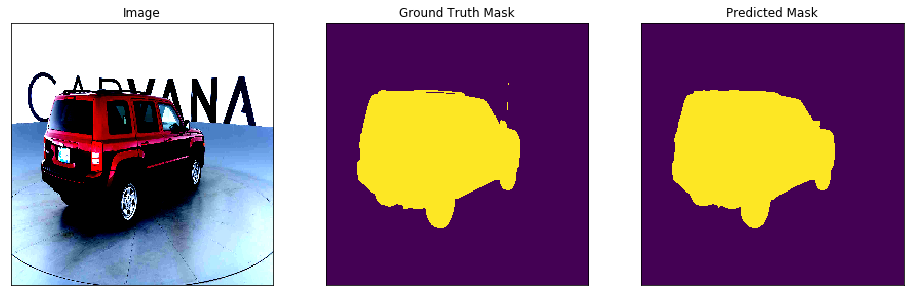

IoU =  0.9916978478431702


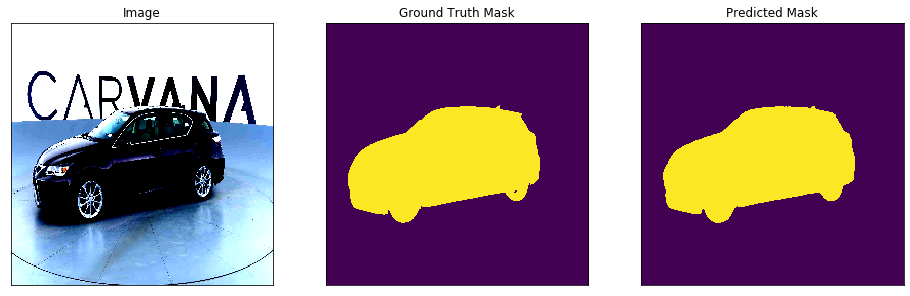

IoU =  0.9876831769943237


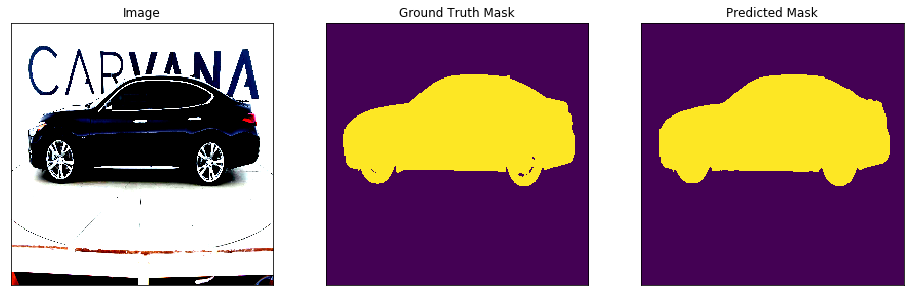

IoU =  0.9915540814399719


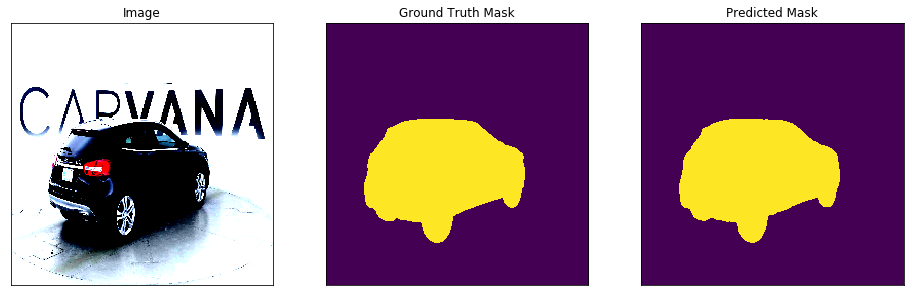

IoU =  0.9904025793075562


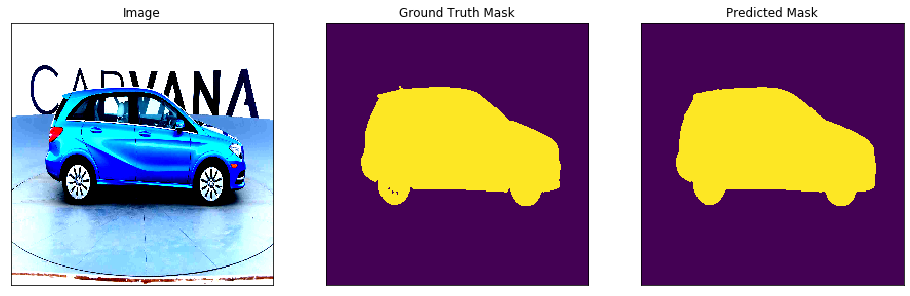

IoU =  0.9762356281280518


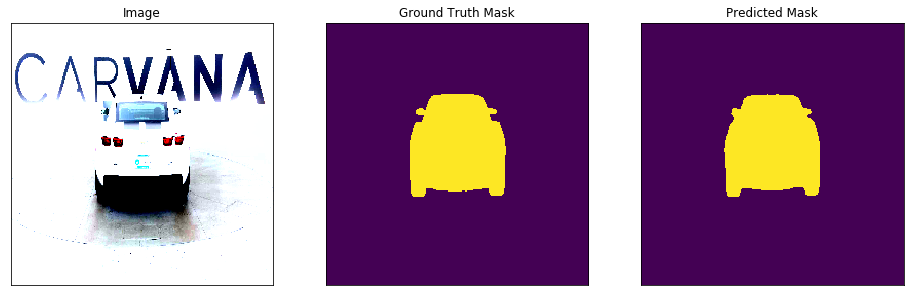

IoU =  0.9905791878700256


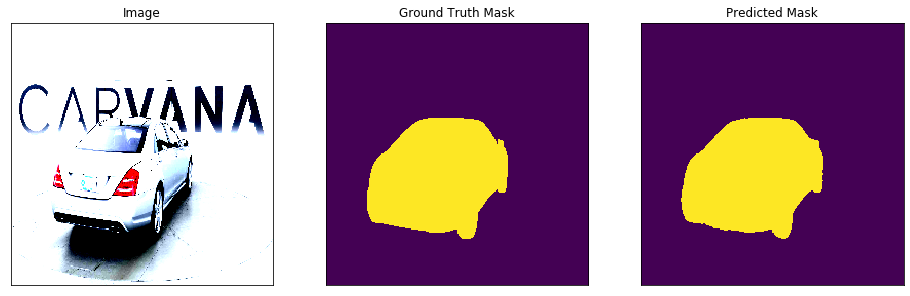

In [38]:
k=0
f = plt.figure()


for i,(x,y) in enumerate(valid_dataset):

    x_tensor = torch.from_numpy(x).to(DEVICE).unsqueeze(0)
    pr_mask = model.predict(x_tensor)
    gt=torch.from_numpy(y).to(DEVICE).unsqueeze(0)

    
    pr = _threshold(pr_mask, threshold=.5)
    print('IoU = ',iou(pr,gt).item())
    im_np=x.transpose(1,2,0)
    pr_np=pr.detach().cpu().numpy().squeeze()
    gt_np=gt.detach().cpu().numpy().squeeze()


    visualize(
        image=im_np, 
        ground_truth_mask=gt_np, 
        predicted_mask=pr_np
    )   
    k+=1
    if k>10:
       
        break

 **7). Поиск путей применения этой модели в бизнесе/реальных задачах/набросок встраивания в веб/мобильное демо**
 
В этом пункте нужно подумать, как эта модель может быть использована в дальнейшем. То есть, например, зачем нужно сегментировать автомобили на дороге? Или одежду?

> Результат пункта -- перечисленные кейсы использования модели (описанные **как можно подробнее**).

*  #### Описанный в соревновании - отделяем машинки от фона студии и затем накладываем их на любой другой фон

*  #### Еще, например, можно такую модель использовать там, где важно не только задетектирвоать объект какого-то класса, а понять насколько он удален исходя из его масштаба

*  #### Либо, не пересечена ли объектом линия, какой-то разметки (напрмиер, дорожная)

*  #### Либо  понять как взаимдейсвуют 2 объекта- например - достаочно ли хорошо сидит каска на рабочем

*  #### Либо, например, а конвеере -сверяем результат сегментации с образцом- под прапвильным ли углом идет деталь, нет ли дефектов 

<h2 style="text-align: center;"><b>Критерии оценивания</b></h2>

* 1-2 пункты -- по 1 баллу  
* 3 пункт -- 0 баллов (промежуточный пункт)  
* 4 пункт -- 3 балла  
* 5 пункт -- 3 балла  
* 6-7 пункты -- по 1 баллу  
* Макс баллов по проекту = 10  

**Успехов в выполнении проекта!** 

Желаю всем проделать полезную, интересную и качественную работу, которую потом нестыдно и в резюме указать, и друзьям показать ;)